<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/ML10_Regresja_wielomianowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)

#Wygenerowanie danych

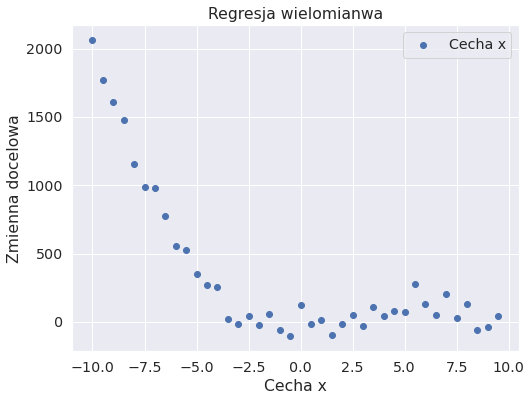

In [42]:
X = np.arange(-10, 10, 0.5)
noise = 80*np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X +3 + noise
X = X.reshape(40,1) #Zmiana z postaci wierszowej na kolumnową
plt.figure(figsize = (8, 6))
plt.title('Regresja wielomianwa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label = 'Cecha x')
plt.legend()
plt.show()

#Model liniowy

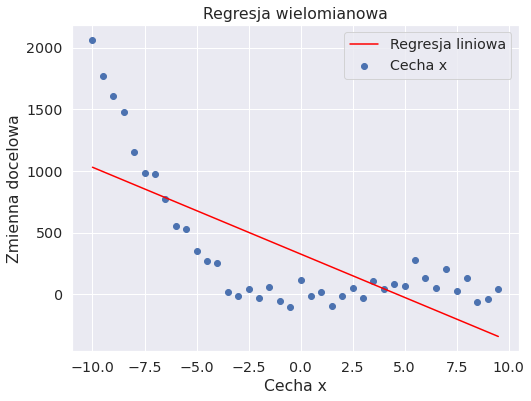

In [43]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred_lin = regressor.predict(X)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label='Cecha x')
plt.plot(X, y_pred_lin, c='red', label='Regresja liniowa')
plt.legend()
plt.show()

##R2 score - widoczne niedopasowanie (underfitting)

In [44]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.5342822962632471

#Ekstrakcja cech wielomianowych - stopień 2

In [45]:
df = pd.DataFrame(data={'X': X.ravel()}) #Spłaszczenie kolumny X do wiersza (reshape(-1))
df.head()

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0


In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [47]:
X_poly.shape

(40, 3)

In [48]:
df = pd.DataFrame(X_poly)
df.columns = ['1', 'X', 'X^2']
df.head()

,1,X,X^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00


##Dopasowanie modelu

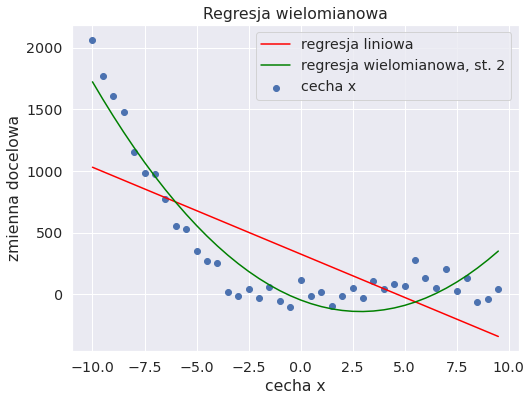

In [49]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred_2 = regressor_poly.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.legend()
plt.show()

In [50]:
r2_score(y, y_pred_2)

0.8951163003458433

#Ekstrakcja cech wielomianowych - stopień 3

In [51]:
poly = PolynomialFeatures(degree = 3)

X_poly_3 = poly.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

##Dopasowanie modelu

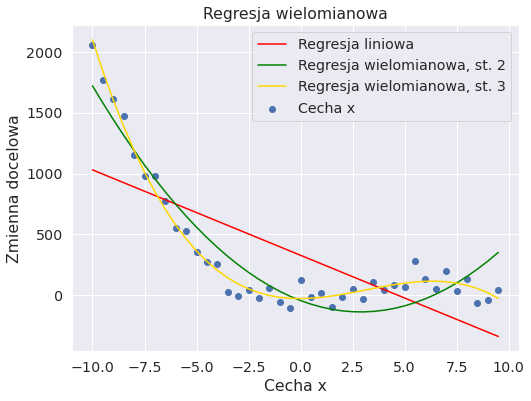

In [52]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label='Cecha x')
plt.plot(X, y_pred_lin, c='red', label='Regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='Regresja wielomianowa, st. 2')
plt.plot(X, y_pred_3, c='gold', label='Regresja wielomianowa, st. 3')
plt.legend()
plt.show()

In [53]:
r2_score(y, y_pred_3)

0.9841708613657418

#(Ekstrakcja cech wielomianowych - stopień 4)

In [54]:
poly = PolynomialFeatures(degree = 4)

X_poly_4 = poly.fit_transform(X)
X_poly_4

array([[    1.    ,   -10.    ,   100.    , -1000.    , 10000.    ],
       [    1.    ,    -9.5   ,    90.25  ,  -857.375 ,  8145.0625],
       [    1.    ,    -9.    ,    81.    ,  -729.    ,  6561.    ],
       [    1.    ,    -8.5   ,    72.25  ,  -614.125 ,  5220.0625],
       [    1.    ,    -8.    ,    64.    ,  -512.    ,  4096.    ],
       [    1.    ,    -7.5   ,    56.25  ,  -421.875 ,  3164.0625],
       [    1.    ,    -7.    ,    49.    ,  -343.    ,  2401.    ],
       [    1.    ,    -6.5   ,    42.25  ,  -274.625 ,  1785.0625],
       [    1.    ,    -6.    ,    36.    ,  -216.    ,  1296.    ],
       [    1.    ,    -5.5   ,    30.25  ,  -166.375 ,   915.0625],
       [    1.    ,    -5.    ,    25.    ,  -125.    ,   625.    ],
       [    1.    ,    -4.5   ,    20.25  ,   -91.125 ,   410.0625],
       [    1.    ,    -4.    ,    16.    ,   -64.    ,   256.    ],
       [    1.    ,    -3.5   ,    12.25  ,   -42.875 ,   150.0625],
       [    1.    ,    -3.    ,   

##Dopasowanie modelu

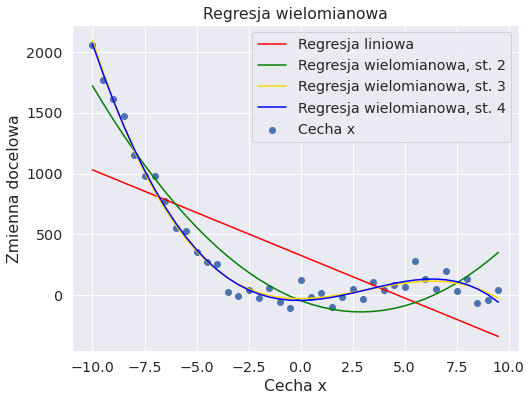

In [56]:
regressor_poly_4 = LinearRegression()
regressor_poly_4.fit(X_poly_4, y)

y_pred_4 = regressor_poly_4.predict(X_poly_4)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X, y, label='Cecha x')
plt.plot(X, y_pred_lin, c='red', label='Regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='Regresja wielomianowa, st. 2')
plt.plot(X, y_pred_3, c='gold', label='Regresja wielomianowa, st. 3')
plt.plot(X, y_pred_4, c='blue', label='Regresja wielomianowa, st. 4')
plt.legend()
plt.show()

In [57]:
r2_score(y, y_pred_4)

0.984786760081455

#Porównanie metryk

In [58]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [60]:
results = pd.DataFrame(data={
    'Nazwa': ['Regresja liniowa', 'Reg. wiel. st. 2', 'Reg. wiel. st. 3', 'Reg. wiel. st. 4'],
    'r2_score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3), r2_score(y, y_pred_4)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3), mae(y, y_pred_4)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3), mse(y, y_pred_4)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3)), np.sqrt(mse(y, y_pred_4))]  
})
results

,Nazwa,r2_score,mae,mse,rmse
0,Regresja liniowa,0.534282,316.267126,143775.153332,379.176942
1,Reg. wiel. st. 2,0.895116,155.977929,32379.421866,179.942829
2,Reg. wiel. st. 3,0.984171,57.572030,4886.730343,69.905152
3,Reg. wiel. st. 4,0.984787,56.584060,4696.591700,68.531684


In [63]:
px.bar(results, x='Nazwa', y='r2_score', width=700, title='Regresja wielomianowa - R2_score')

In [65]:
px.bar(results, x='Nazwa', y='mae', width=700, title='Regresja wielomianowa - mean absolute error')

In [66]:
px.bar(results, x='Nazwa', y='mse', width=700, title='Regresja wielomianowa - mean squared error')

In [67]:
px.bar(results, x='Nazwa', y='rmse', width=700, title='Regresja wielomianowa - root mean squared error')